In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

digits = load_digits()
images = digits.images
targets = digits.target

ss = StandardScaler(with_std=False)
X = ss.fit_transform(digits['data'])

knn = NearestNeighbors(algorithm='ball_tree', n_neighbors=25, leaf_size=30)
knn.fit(X)


NearestNeighbors(algorithm='ball_tree', n_neighbors=25)

In [5]:
X_noise = X[50] + np.random.normal(0.0, 1.5, size=(64, ))

distances, neighbors = knn.kneighbors(X_noise.reshape(1, -1), return_distance=True)
print(distances[0])

[12.11010166 20.04254346 24.79412632 27.4364436  27.67665065 29.46717693
 30.39095132 30.72823196 31.5536238  31.59311607 32.07564201 32.77219858
 33.24441865 33.28119441 33.29691847 33.3766769  33.99172146 34.17165135
 34.81990654 34.88370175 35.08341429 35.10059267 35.11186489 35.13964222
 35.38863255]


25


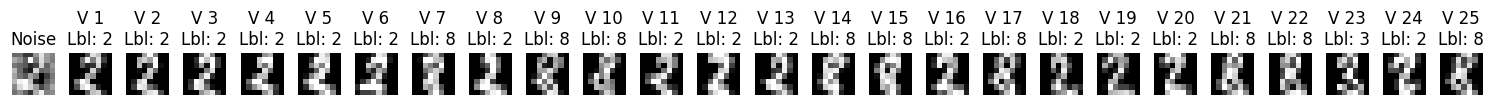

In [6]:
# 5. Mostrar imágenes
fig, axes = plt.subplots(1, 26, figsize=(15, 2))

# Imagen original con ruido
axes[0].imshow(X_noise.reshape(8, 8), cmap='gray')
axes[0].set_title("Noise")
axes[0].axis('off')

print(len(neighbors[0]))

# Vecinos más cercanos
for i, neighbor_idx in enumerate(neighbors[0]):
    axes[i + 1].imshow(images[neighbor_idx], cmap='gray')
    axes[i + 1].set_title(f"V {i+1}\nLbl: {targets[neighbor_idx]}")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()